In [ ]:
#Share link: https://colab.research.google.com/drive/1XOTaPKAyJEjkJ2UtJD075dIvLPVDIi0m?usp=sharing

#Midterm Code Section

In [ ]:
#some of the packages they reccomended for the midterm analysis; we're group 65 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import ttest_ind
!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import chi2_contingency


In [ ]:
#loading the dataset
ASD=pd.read_csv("https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv?raw=true")

In [ ]:
#Cleaning/pre-processing
pd.set_option('display.max_columns', None)
#we could compate Sex and Age Group,Search Reasons with each other, Arrest reasons with each other, Strip Search with Booked (whether they were searched or arrested), Arrest reasons with booked, search reasons with whether they were searched with ANOVAs
ASD.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0000,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0000,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0000,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0000,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0000,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Check the column names and data types
print(ASD.dtypes)

# Check for missing values
print(ASD.isnull().sum())


Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
# Summary statistics of numerical columns
print(ASD.describe())

       Arrest_Year      EventID     ArrestID    PersonID  StripSearch  \
count   65276.0000   65276.0000   64807.0000  65276.0000   65276.0000   
mean     2020.5101 1029997.6554 6032401.8141 318599.9197       0.1195   
std         0.4999   17318.0896   18707.5096  10815.3879       0.3244   
min      2020.0000 1000000.0000 6000000.0000 300000.0000       0.0000   
25%      2020.0000 1015000.7500 6016201.5000 309215.0000       0.0000   
50%      2021.0000 1030005.5000 6032402.0000 318595.5000       0.0000   
75%      2021.0000 1044996.2500 6048602.5000 327926.2500       0.0000   
max      2021.0000 1060002.0000 6064804.0000 337346.0000       1.0000   

          Booked  Actions_at_arrest___Concealed_i  \
count 65276.0000                       65276.0000   
mean      0.5195                           0.0041   
std       0.4996                           0.0637   
min       0.0000                           0.0000   
25%       0.0000                           0.0000   
50%       1.0000        

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
#this should change plot size

In [ ]:
#some functions from Tutorial:

def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''
def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


In [ ]:
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

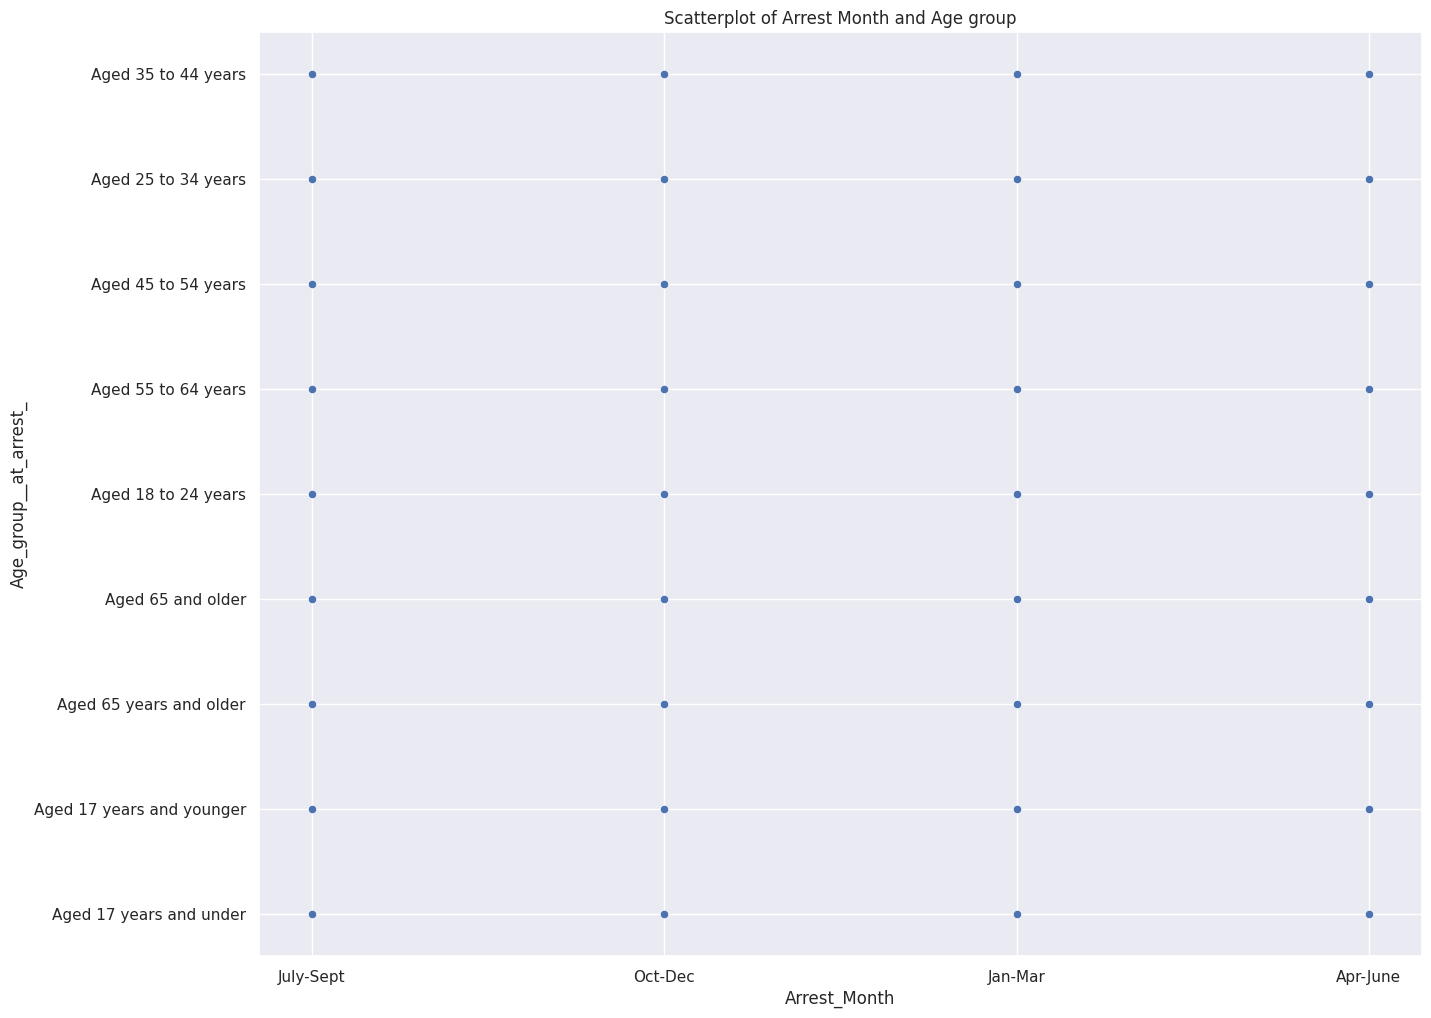

In [ ]:
# Check the relationship between age and arrest date
sns.scatterplot(x="Arrest_Month", y="Age_group__at_arrest_", data=ASD)
plt.title('Scatterplot of Arrest Month and Age group')
plt.show()

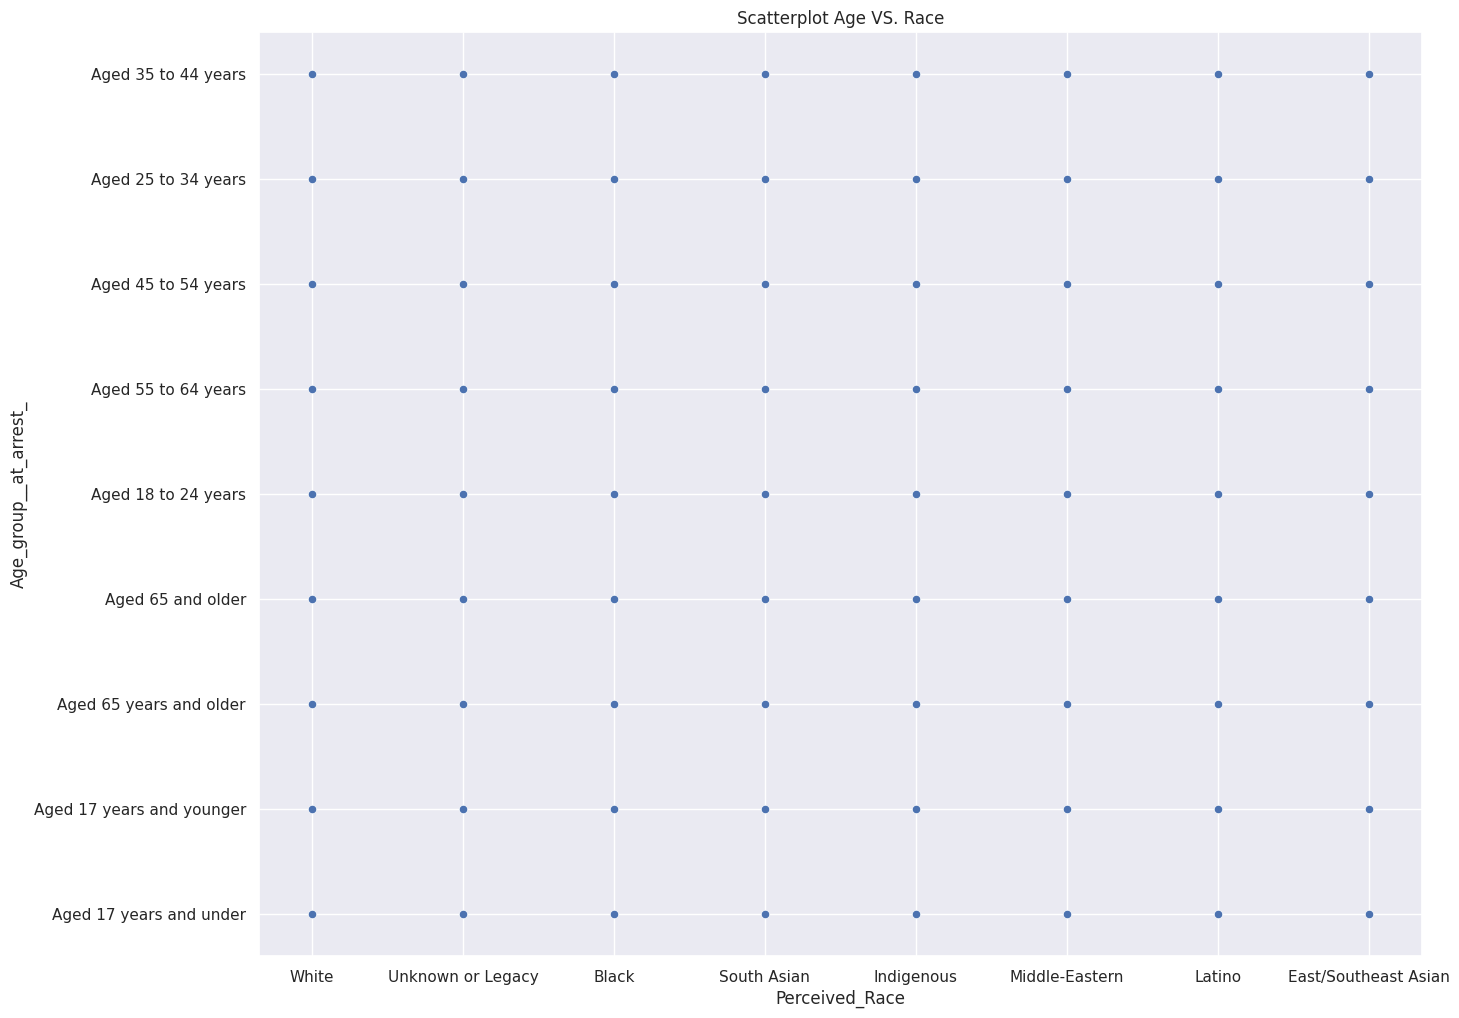

In [ ]:
# Check the relationship between age and race
sns.scatterplot(x="Perceived_Race", y="Age_group__at_arrest_", data=ASD)
plt.title("Scatterplot Age VS. Race")
plt.show()

Text(0.5, 1.0, 'Counted by age')

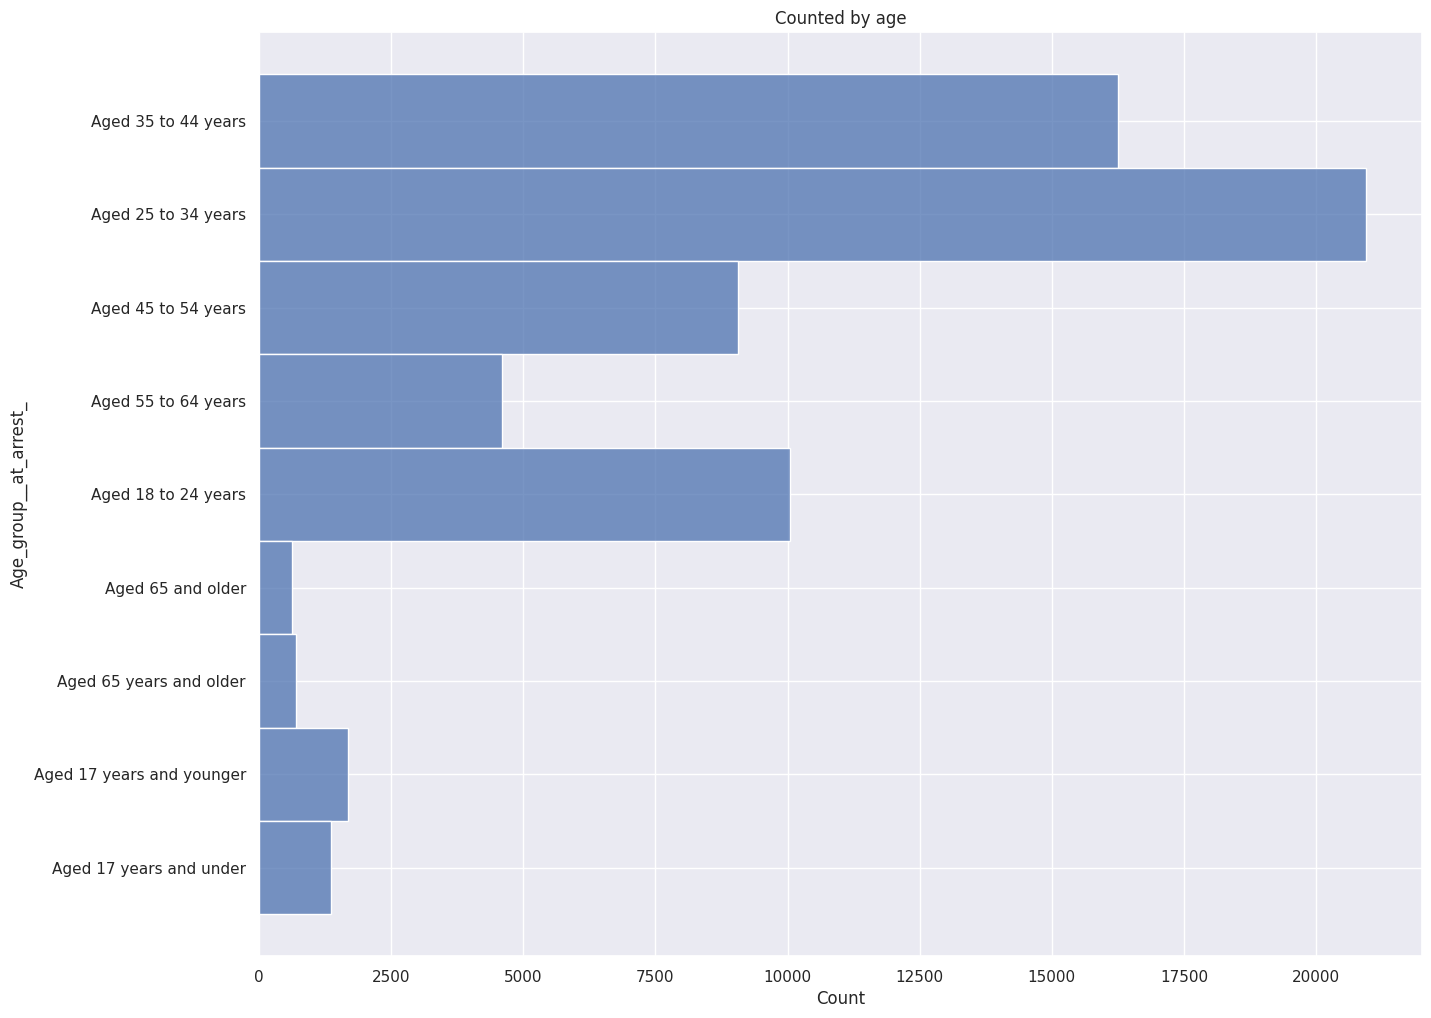

In [ ]:
# Plot a histogram of the "Age" column
sns.histplot(data=ASD,y="Age_group__at_arrest_")
plt.title("Counted by age")

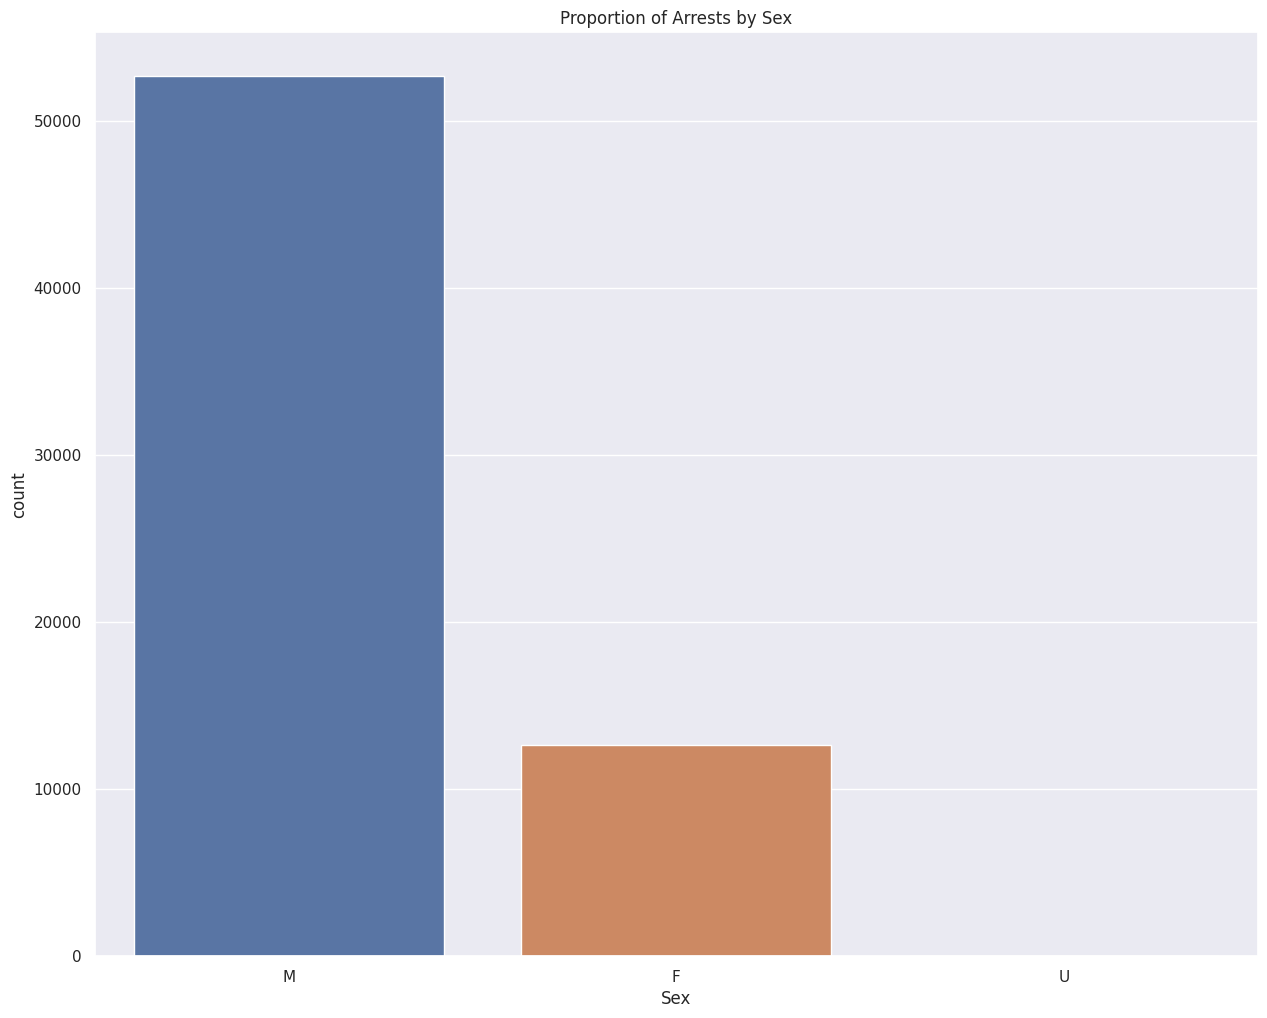

In [ ]:
# Check the distribution of gender
sns.countplot(x="Sex", data=ASD)
plt.title("Proportion of Arrests by Sex")
plt.show()

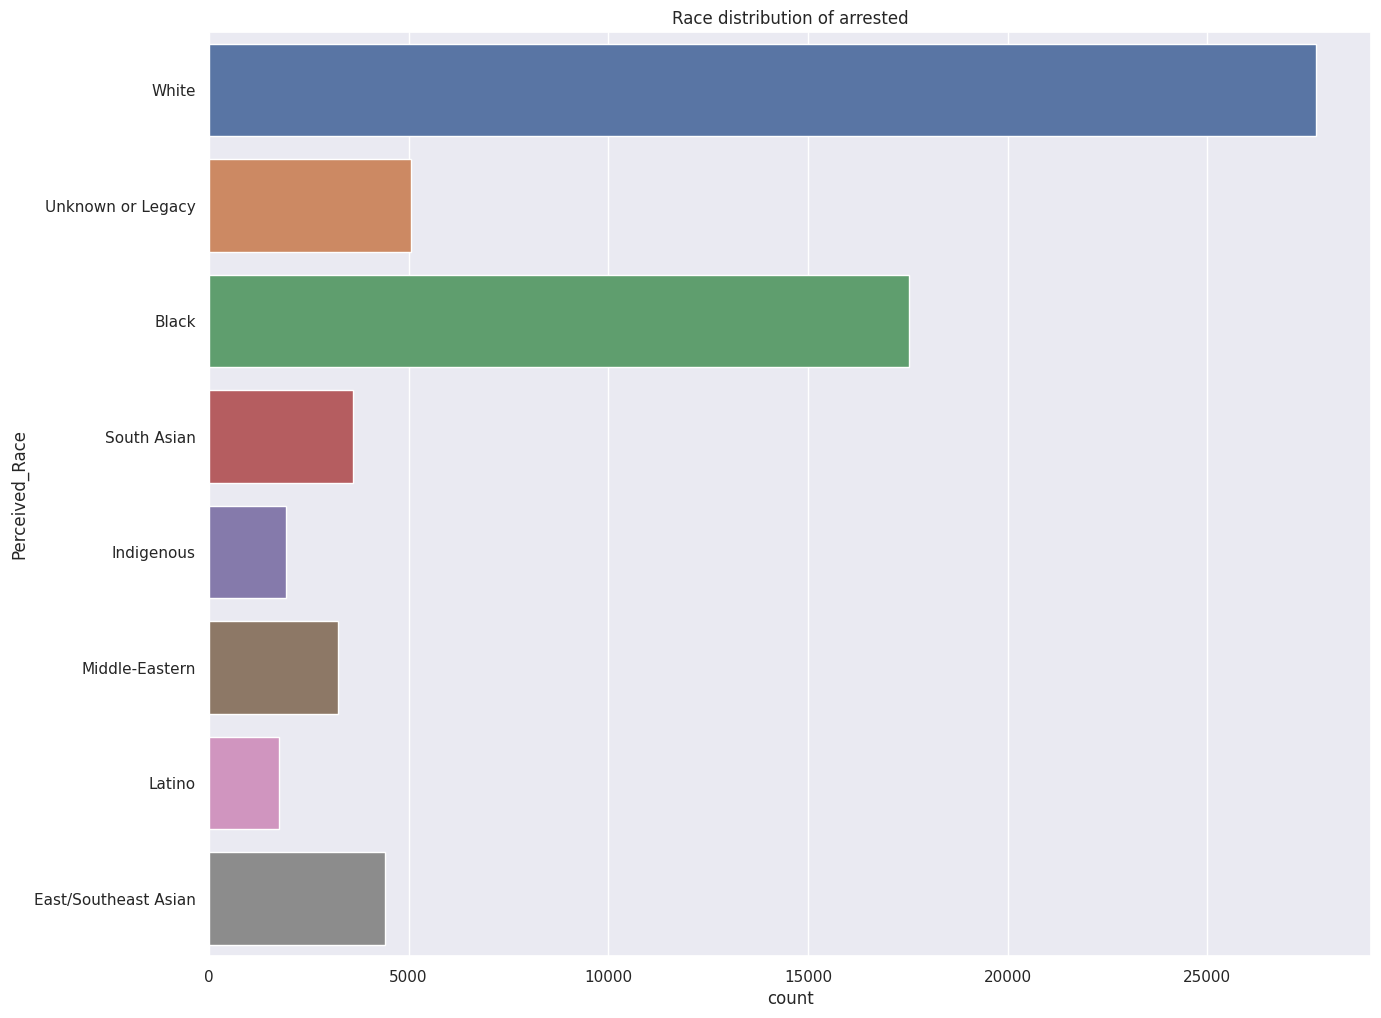

In [ ]:
# Check the distribution of race
sns.countplot(y="Perceived_Race", data=ASD, orient='h')
plt.title("Race distribution of arrested")
plt.show()

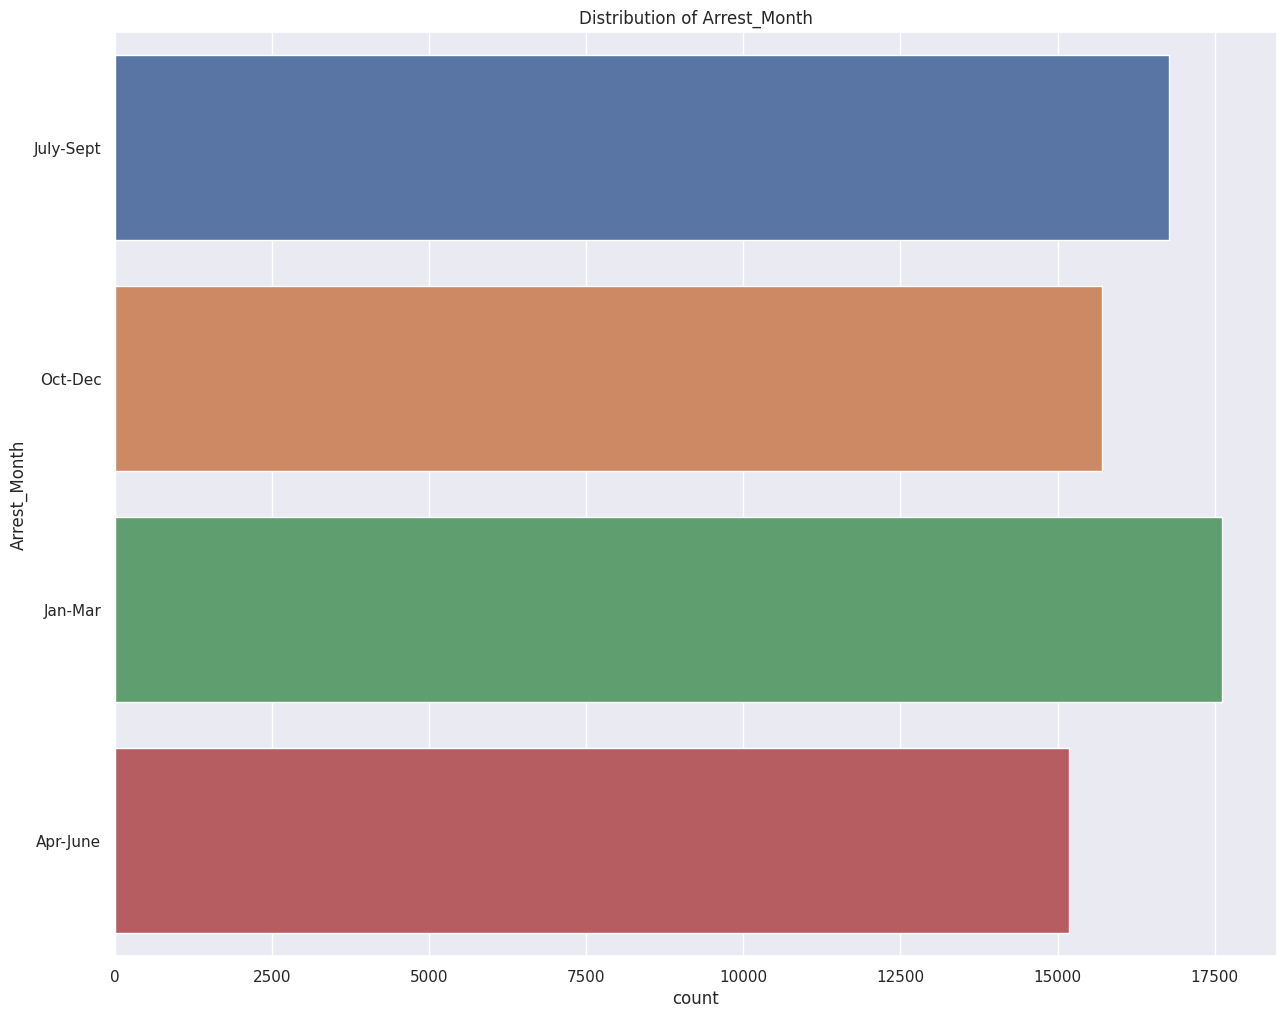

In [ ]:
sns.countplot(y="Arrest_Month", data=ASD, orient='h')
plt.title("Distribution of Arrest_Month")
plt.show()

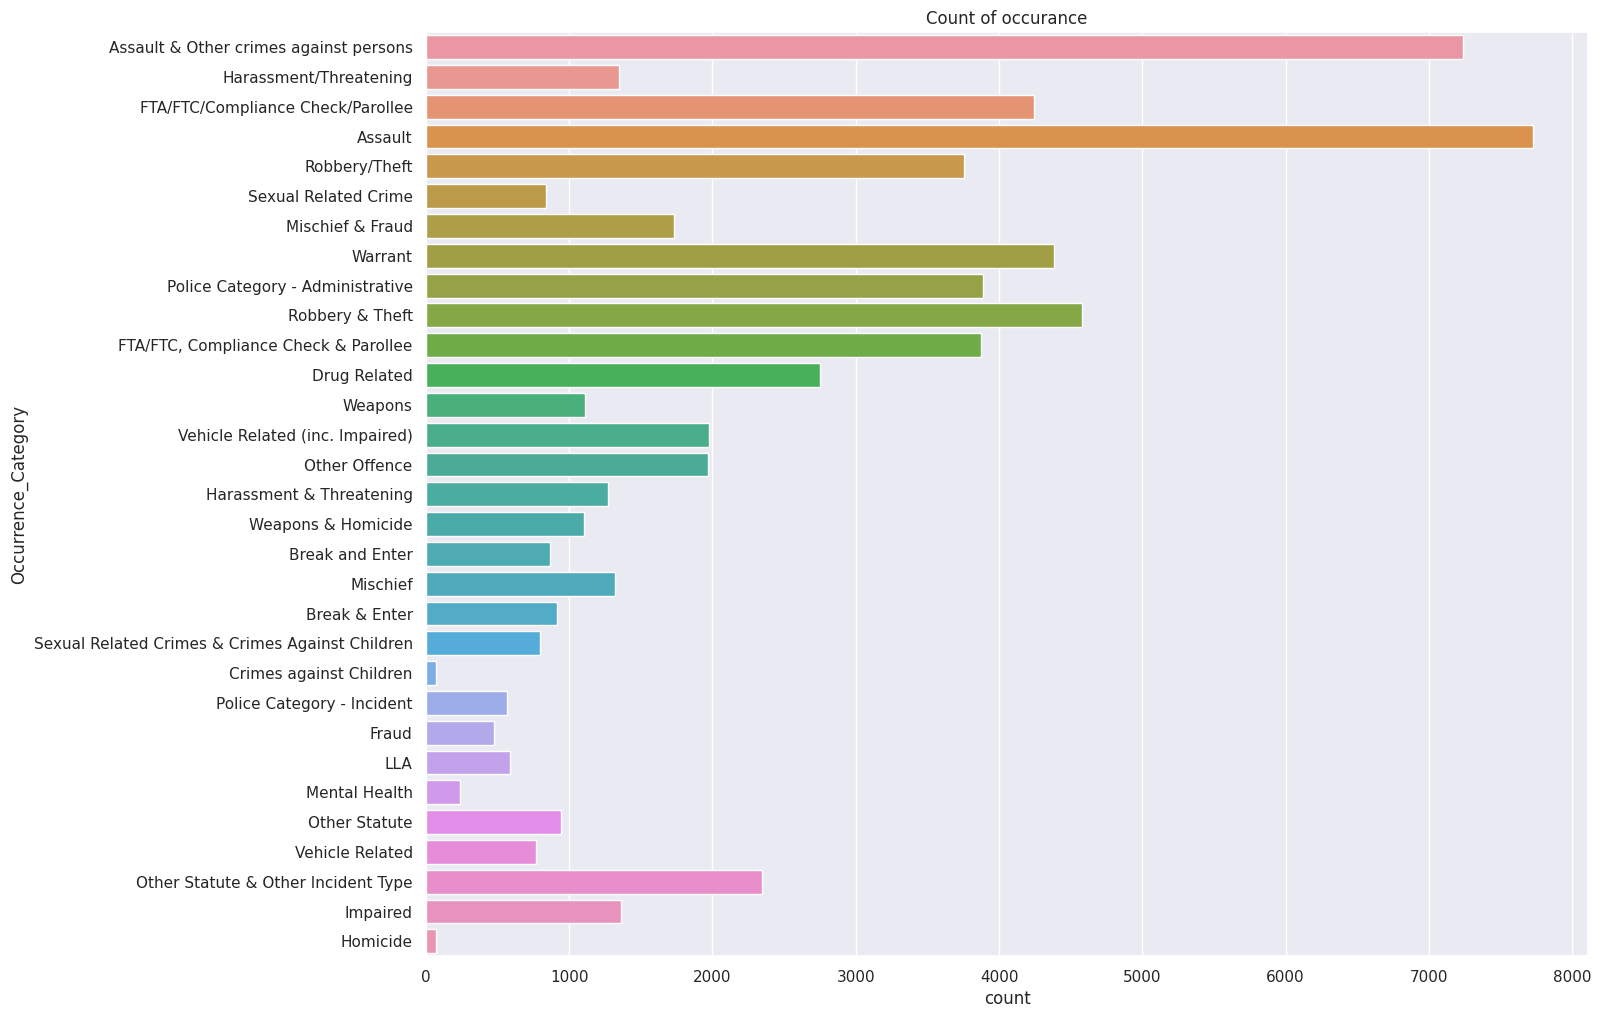

In [ ]:
# Check the distribution of Occurrence_Category 
sns.countplot(y="Occurrence_Category", data=ASD, orient='h')
plt.title("Count of occurance")
plt.show()

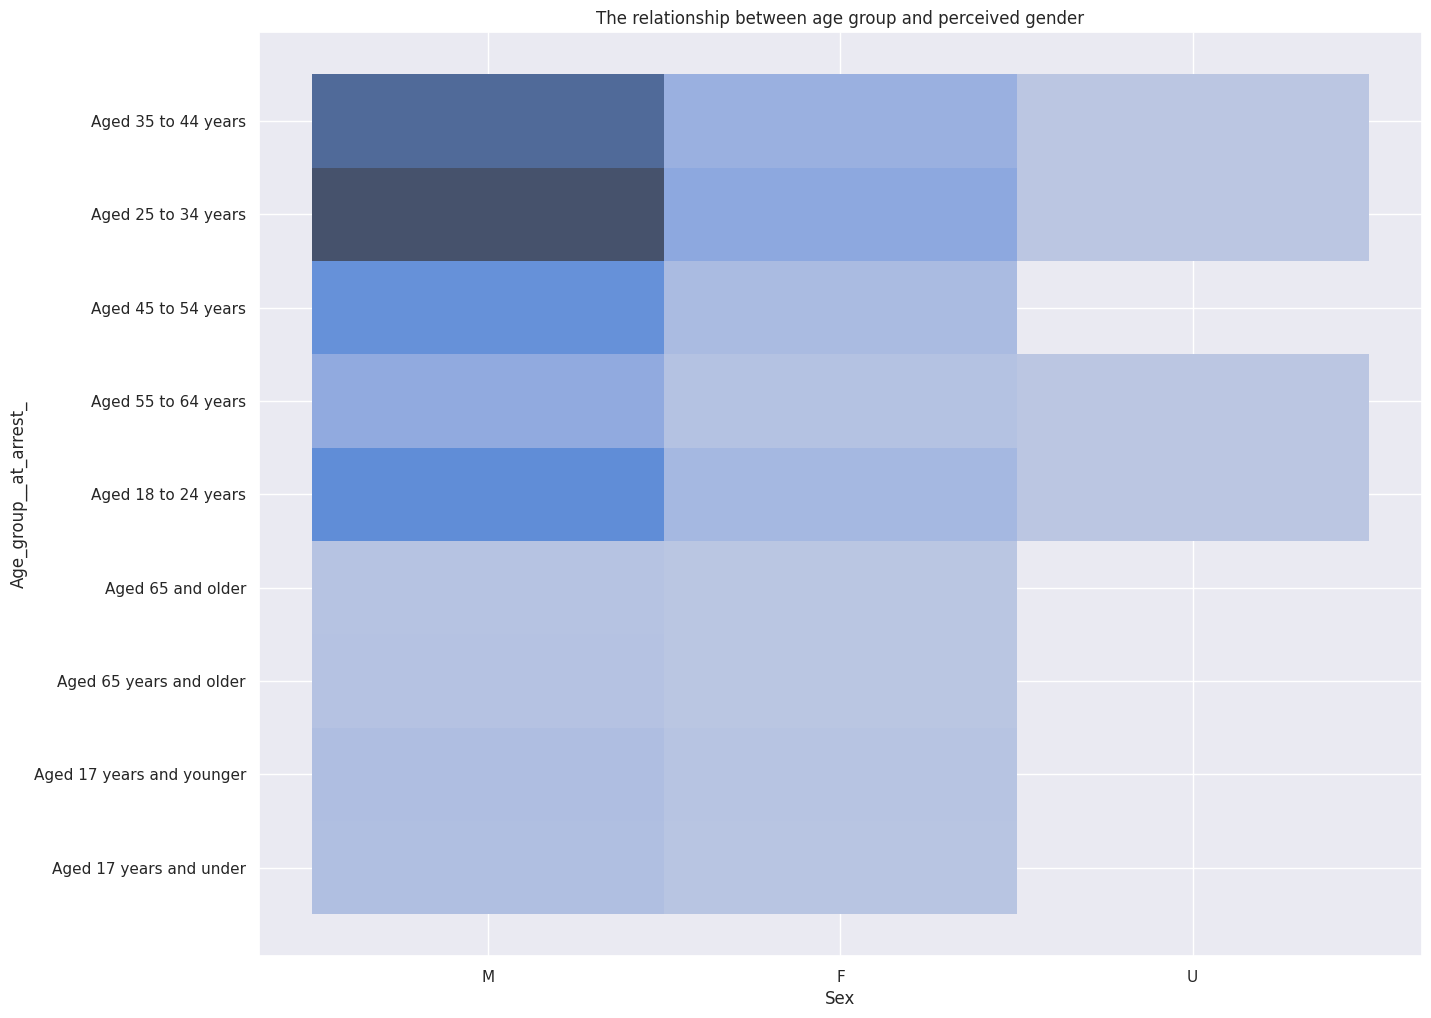

In [ ]:
# Create a plot showing the relationship between age group and perceived gender
sns.histplot(x="Sex", y="Age_group__at_arrest_", data=ASD)
plt.title("The relationship between age group and perceived gender")
plt.show()

In [ ]:
# Create a pivot table of the occurrence category and perceived race
pivot_table = pd.pivot_table(ASD, values='ObjectId', index='Occurrence_Category', columns='Perceived_Race', aggfunc='count')
# Print the pivot table
print(pivot_table)

Perceived_Race                                   Black  East/Southeast Asian  \
Occurrence_Category                                                            
Assault                                           2127                   648   
Assault & Other crimes against persons            1983                   597   
Break & Enter                                      143                    39   
Break and Enter                                    141                    45   
Crimes against Children                              9                     9   
Drug Related                                       948                   211   
FTA/FTC, Compliance Check & Parollee              1043                   201   
FTA/FTC/Compliance Check/Parollee                 1123                   225   
Fraud                                              118                    57   
Harassment & Threatening                           332                    63   
Harassment/Threatening                  

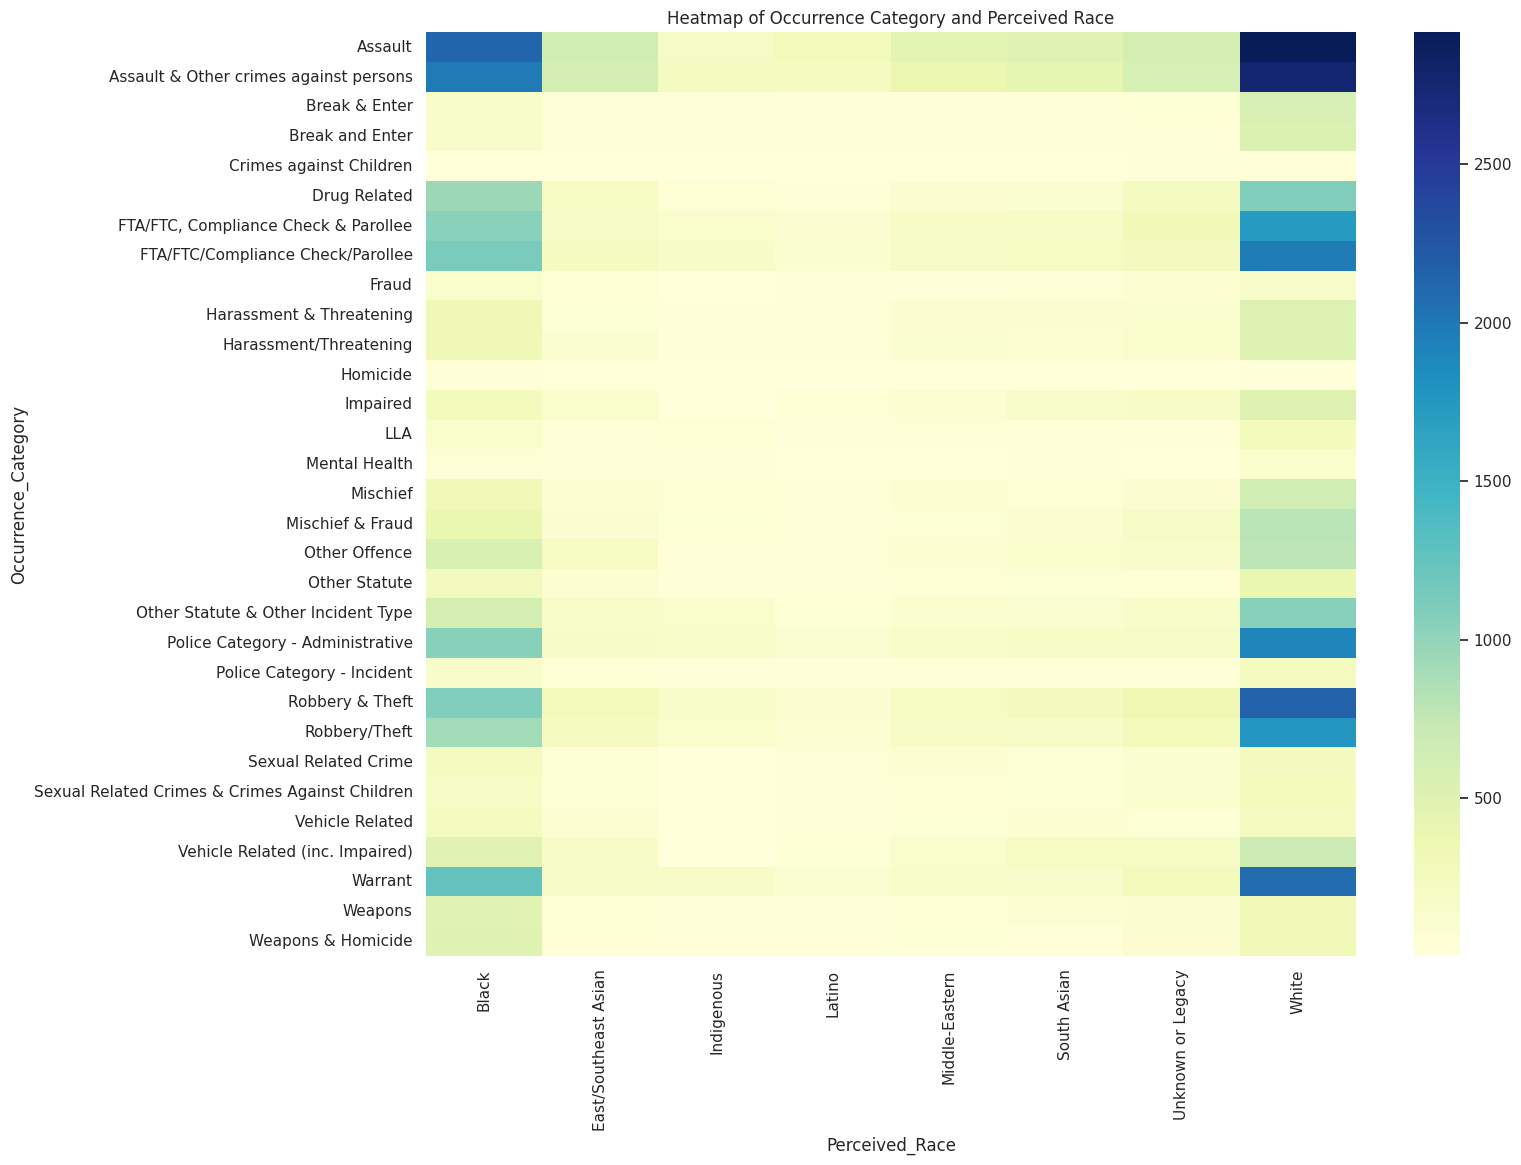

In [ ]:
# xCreate the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Occurrence Category and Perceived Race')
plt.show()

In [ ]:
# Create separate DataFrames for each group
men = ASD[ASD['Sex'] == 'M']
women = ASD[ASD['Sex'] == 'F']
# Count the number of arrests for each group
num_arrests_men = men.shape[0]
num_arrests_women = women.shape[0]

print("Number of arrests for men:", num_arrests_men)
print("Number of arrests for women:", num_arrests_women)



Number of arrests for men: 52650
Number of arrests for women: 12617


In [ ]:
from scipy.stats.mstats_basic import ttest_1samp
# Extract the number of arrests for men and women
menenc = men['ObjectId']
womenenc = women['ObjectId']

# Perform t-test
print('Ttest for men and womens police encounters:',stats.ttest_ind(menenc,womenenc,equal_var=False))


Ttest for men and womens police encounters: Ttest_indResult(statistic=-16.55730686338168, pvalue=3.7159762383042504e-61)


In [ ]:
# Calculate the means and variances for each group
mean_men = men.mean()
mean_women = women.mean()
var_men = men.var()
var_women = women.var()

# Calculate the degrees of freedom
df_men = men.shape[0] - 1
df_women = women.shape[0] - 1

# Calculate the pooled variance
pooled_var = ((df_men * var_men) + (df_women * var_women)) / (df_men + df_women)

# Calculate the t-statistic and p-value
t_statistic = (mean_men - mean_women) / (pooled_var * ((1/df_men) + (1/df_women)))**0.5
p_value = stats.t.sf(abs(t_statistic), df_men + df_women) * 2

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: Arrest_Year                        -0.8489
EventID                             0.9309
ArrestID                           -0.2773
PersonID                           -0.7235
StripSearch                         6.8782
Booked                             21.1621
Actions_at_arrest___Concealed_i     4.7336
Actions_at_arrest___Combative__    -0.3020
Actions_at_arrest___Resisted__d     2.6159
Actions_at_arrest___Mental_inst    -4.6461
Actions_at_arrest___Assaulted_o    -3.0896
Actions_at_arrest___Cooperative     3.9204
SearchReason_CauseInjury           -0.5874
SearchReason_AssistEscape           3.6237
SearchReason_PossessWeapons        19.0999
SearchReason_PossessEvidence        6.7702
ItemsFound                         -8.4116
ObjectId                          -16.3148
dtype: float64
p-value: [0.3959 0.3519 0.7815 0.4694 0.0000 0.0000 0.0000 0.7627 0.0089 0.0000
 0.0020 0.0001 0.5569 0.0003 0.0000 0.0000 0.0000 0.0000]


In [ ]:
#Frequency and proportion of strip searches overall
total_strip_searches = ASD['StripSearch'].sum()
total_arrests = len(ASD)
proportion_strip_searches = total_strip_searches / total_arrests
print('Total strip searches: ', total_strip_searches)
print('Total arrests: ', total_arrests)
print('Proportion of arrests with strip searches: ', proportion_strip_searches)

Total strip searches:  7801
Total arrests:  65276
Proportion of arrests with strip searches:  0.11950793553526565


In [ ]:
# Frequency and proportion of strip searches by gender

strip_search_by_gender = ASD.groupby('Sex')['StripSearch'].sum()
total_by_gender = ASD.groupby('Sex')['StripSearch'].count()
proportion_by_gender = strip_search_by_gender / total_by_gender
print('Strip searches by gender:')
print(proportion_by_gender)

Strip searches by gender:
Sex
F   0.1017
M   0.1238
U   0.0000
Name: StripSearch, dtype: float64


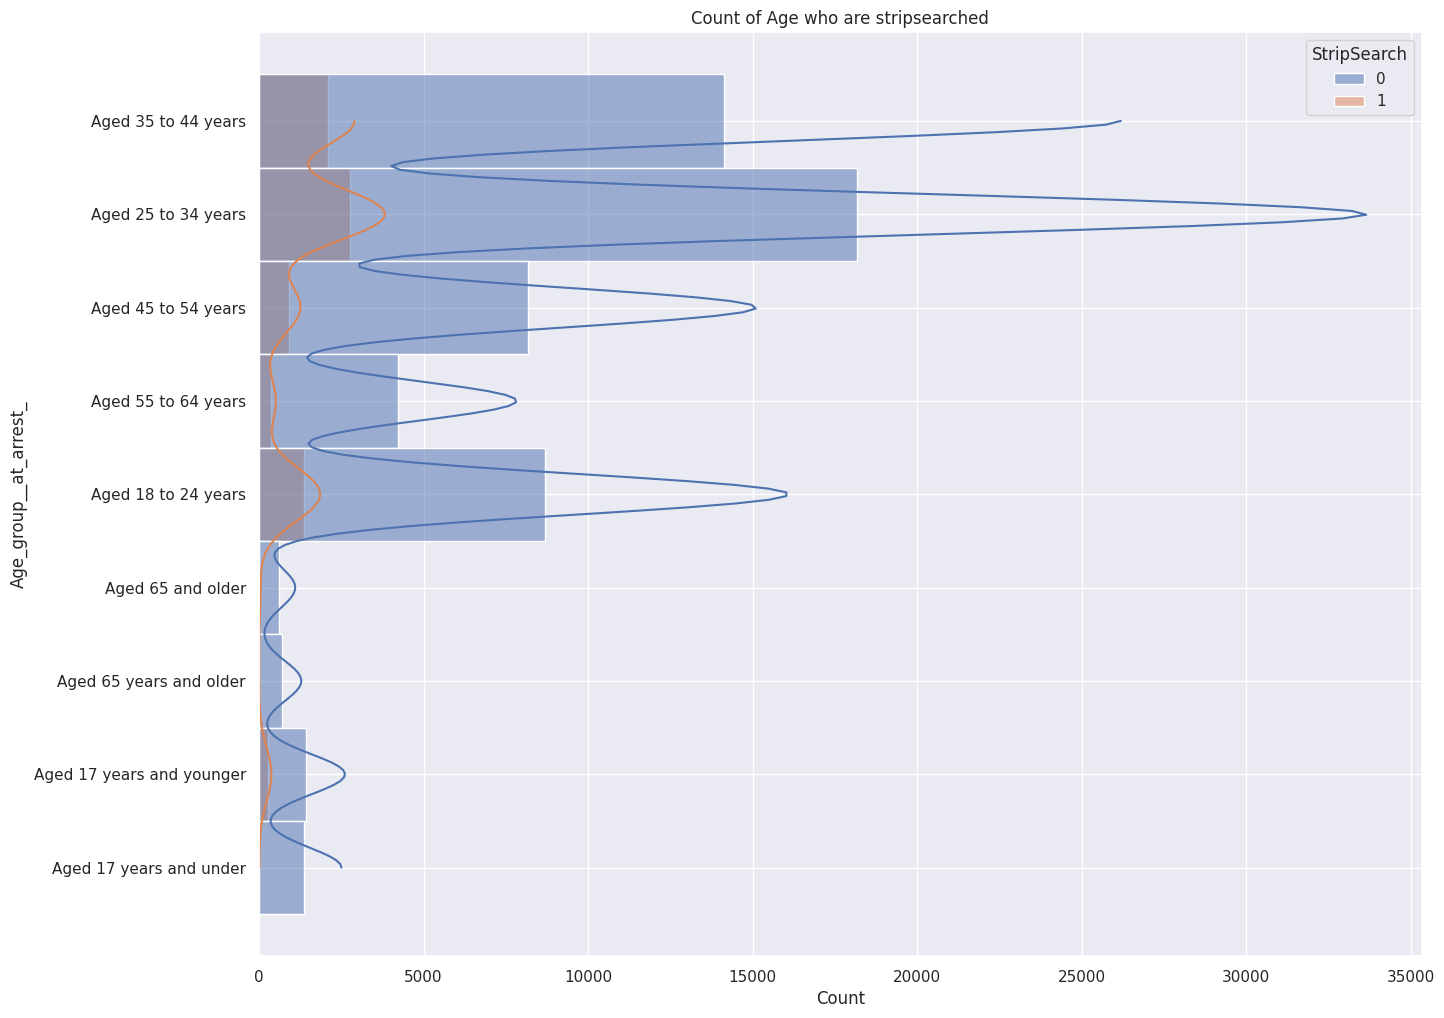

In [ ]:
sns.histplot(data=ASD, y='Age_group__at_arrest_', hue='StripSearch', kde=True, bins=30)
plt.title('Count of Age who are stripsearched')
plt.show()



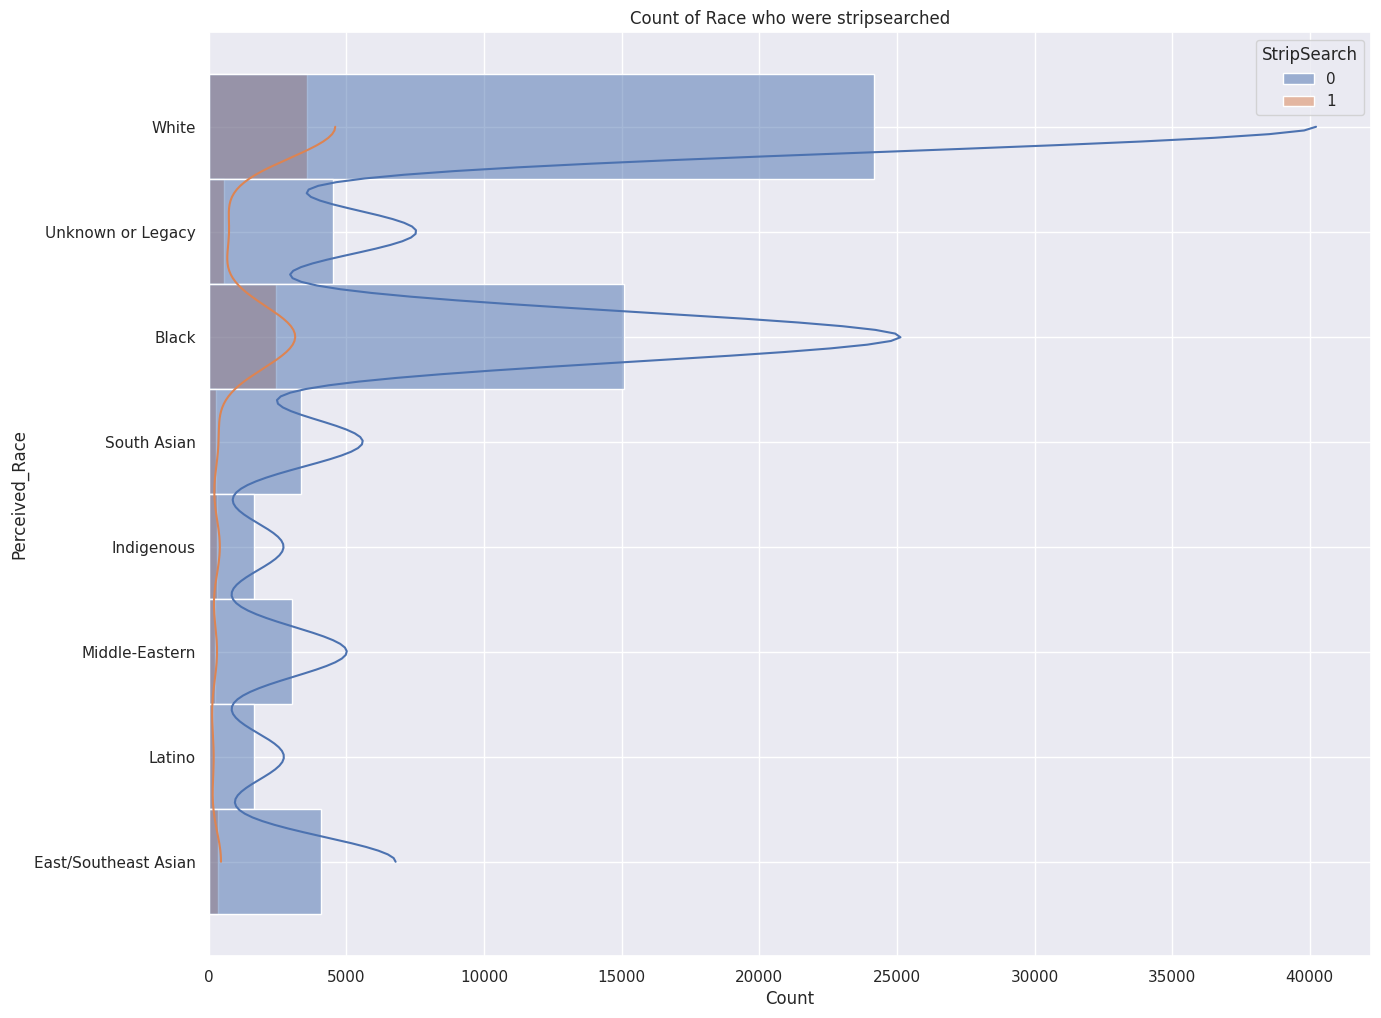

In [ ]:
sns.histplot(data=ASD, y='Perceived_Race', hue='StripSearch', kde=True, bins=30)
plt.title('Count of Race who were stripsearched')
plt.show()


In [ ]:
# Calculate total number of arrests for each race
arrests_by_race = ASD.groupby('Perceived_Race')['ArrestID'].count()

# Calculate total number of strip searches for each race
strip_searches_by_race = ASD.groupby('Perceived_Race')['StripSearch'].sum()

# Calculate the ratio of strip searches to arrests for each race
strip_search_ratio_by_race = strip_searches_by_race / arrests_by_race

In [ ]:
# Print out the results
print('Total arrests by race:')
print(arrests_by_race)
print()

print('Total strip searches by race:')
print(strip_searches_by_race)
print()

print('Strip search ratio by race:')
print(strip_search_ratio_by_race)

Total arrests by race:
Perceived_Race
Black                   17391
East/Southeast Asian     4401
Indigenous               1915
Latino                   1761
Middle-Eastern           3223
South Asian              3604
Unknown or Legacy        5014
White                   27495
Name: ArrestID, dtype: int64

Total strip searches by race:
Perceived_Race
Black                   2434
East/Southeast Asian     341
Indigenous               306
Latino                   132
Middle-Eastern           228
South Asian              257
Unknown or Legacy        536
White                   3566
Name: StripSearch, dtype: int64

Strip search ratio by race:
Perceived_Race
Black                  0.1400
East/Southeast Asian   0.0775
Indigenous             0.1598
Latino                 0.0750
Middle-Eastern         0.0707
South Asian            0.0713
Unknown or Legacy      0.1069
White                  0.1297
dtype: float64


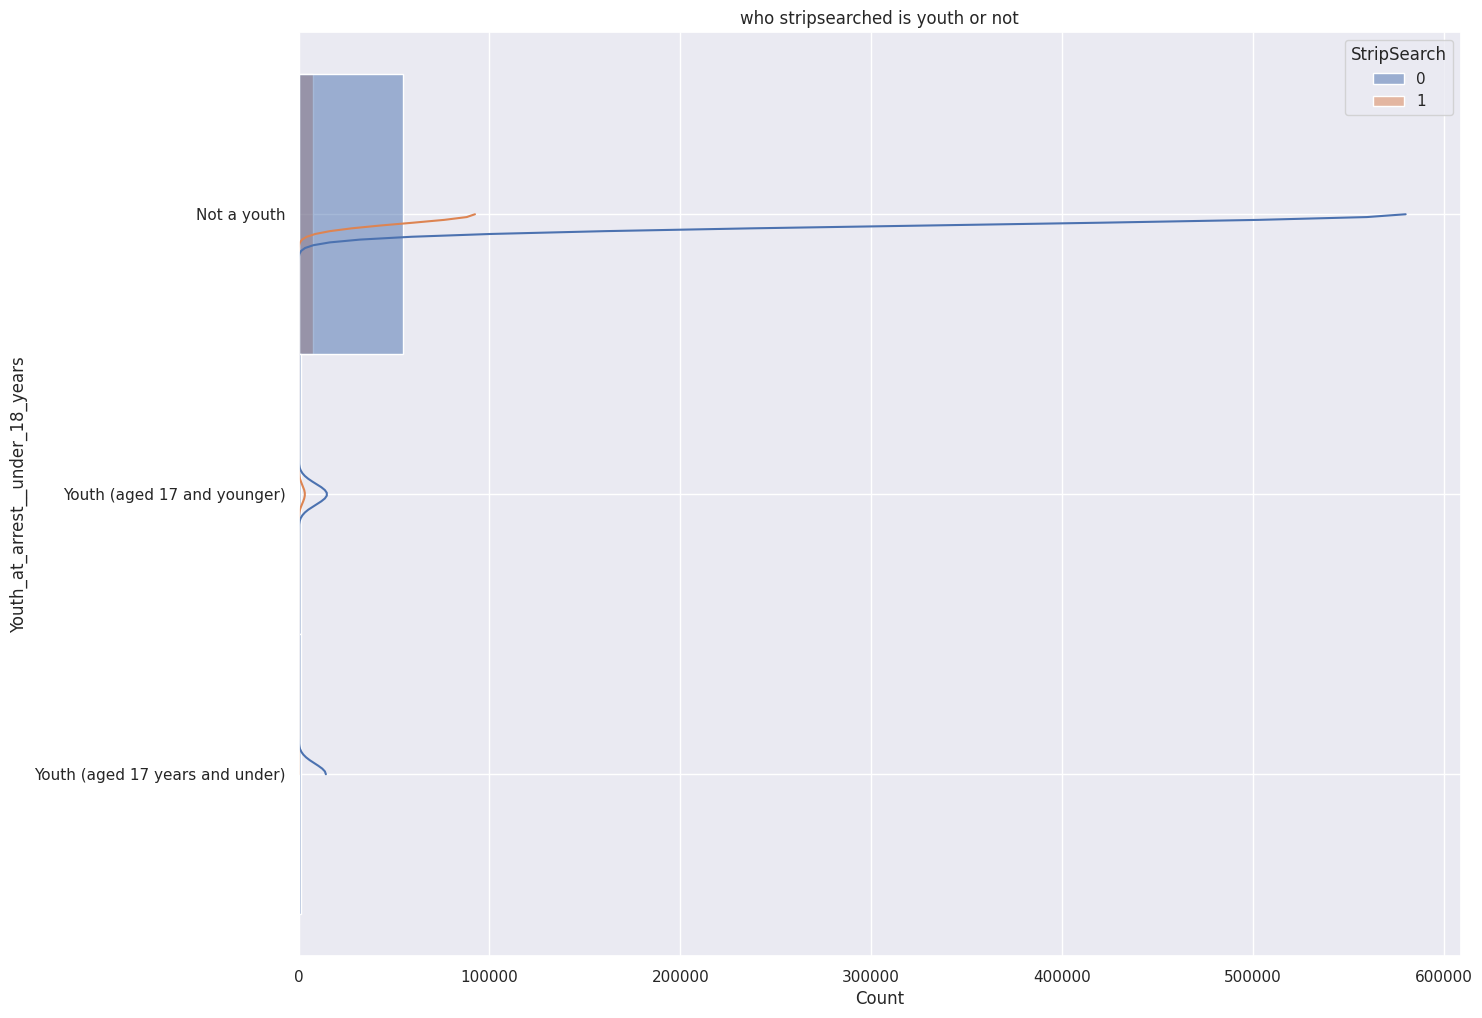

In [ ]:
sns.histplot(data=ASD, y='Youth_at_arrest__under_18_years', hue='StripSearch', kde=True, bins=30)
plt.title('who stripsearched is youth or not')
plt.show()

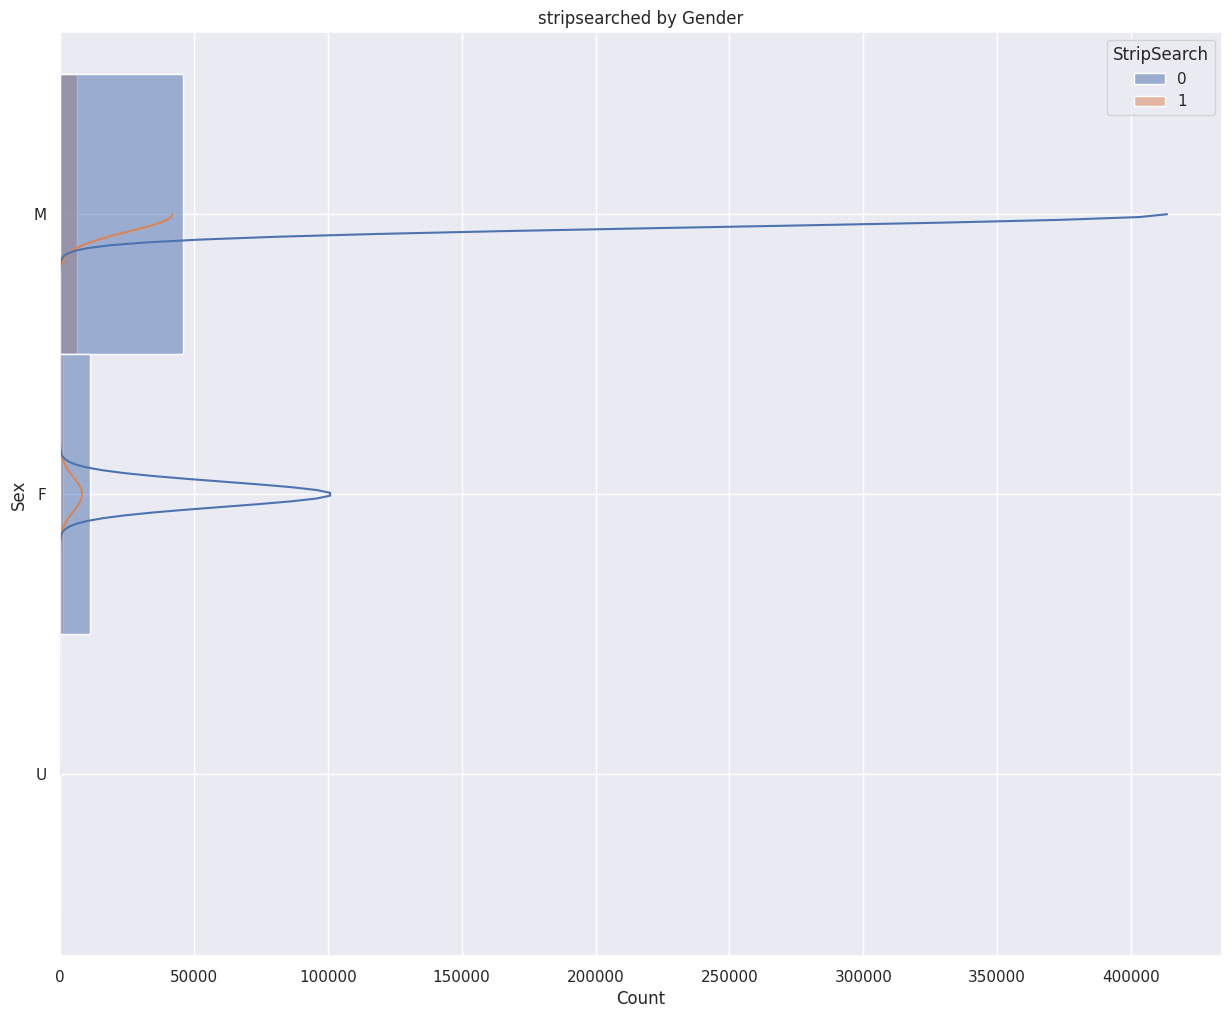

In [ ]:
sns.histplot(data=ASD, y='Sex', hue='StripSearch', kde=True, bins=30)
plt.title('stripsearched by Gender')
plt.show()

In [ ]:
# Chi-square test for independence between strip searches and gender
contingency_table = pd.crosstab(ASD['Sex'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between gender and strip searches.')
else:
    print('There is no significant association between gender and strip searches.')

Chi-square statistic: 48.50795288939
P-value: 2.9284098963956234e-11
There is a significant association between gender and strip searches.


In [ ]:
# Chi-square test for independence between strip searches and race
contingency_table = pd.crosstab(ASD['Perceived_Race'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Perceived_Race and strip searches.')
else:
    print('There is no significant association between Perceived_Race and strip searches.')

Chi-square statistic: 383.9386412604204
P-value: 6.62139843678172e-79
There is a significant association between Perceived_Race and strip searches.


In [ ]:
contingency_table = pd.crosstab(ASD['Age_group__at_arrest_'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Age_group__at_arrest_ and strip searches.')
else:
    print('There is no significant association between Age_group__at_arrest_ and strip searches.')

Chi-square statistic: 478.4256370791342
P-value: 2.9843711708976695e-98
There is a significant association between Age_group__at_arrest_ and strip searches.


In [ ]:
#1-way ANOVA
# Create a new variable that contain race and police encounters
whitep = ASD[ASD['Perceived_Race']=='White']['ObjectId']

blackp = ASD[ASD['Perceived_Race']=='Black']['ObjectId']

indigp = ASD[ASD['Perceived_Race']== 'Indigenous']['ObjectId']

SEAp = ASD[ASD['Perceived_Race']== 'East/Southeast Asian']['ObjectId']

Latinop = ASD[ASD['Perceived_Race']== 'Latino']['ObjectId']

MidEp = ASD[ASD['Perceived_Race']== 'Middle-Eastern']['ObjectId']

SAp = ASD[ASD['Perceived_Race']== 'South Asian']['ObjectId']

# Do Anova
statistic, pvalue = f_oneway(whitep, blackp, Latinop)

# Perform one-way ANOVA on the white black and lation data to prove this works
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 151.25113025181153, p = 3.333445094545649e-66


In [ ]:
# 1 way ANOVAs indig SEA and MidEast
# Do Anova
statistic2, pvalue2 = f_oneway(indigp, SEAp, MidEp)

# Perform one-way ANOVA on the white black and lation data to prove this works
print(f'One-way ANOVA: s = {statistic2}, p = {pvalue2}')

One-way ANOVA: s = 139.9296718799738, p = 1.2582718778238493e-60


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#shift races to str for Tukey test
ASD=ASD.astype({'Perceived_Race':'str'})

In [ ]:
ASD.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
#Run Tukey test on this data
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=ASD['ObjectId'], 
                          groups=ASD['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1               group2         meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------------------------
               Black East/Southeast Asian   7689.801    0.0   6715.2668  8664.3352   True
               Black           Indigenous  -756.9805  0.751  -2143.6643   629.7032  False
               Black               Latino  8094.2961    0.0   6650.1729  9538.4193   True
               Black       Middle-Eastern   6101.318    0.0   4994.1643  7208.4718   True
               Black          South Asian  6168.5385    0.0   5111.1308  7225.9463   True
               Black    Unknown or Legacy  2607.2234    0.0   1683.3512  3531.0956   True
               Black                White   700.8303 0.0032    142.3361  1259.3244   True
               Black                  nan  9034.2933 0.9887 -19905.4849 37974.0714  False
East/South

In [ ]:
ASD.tail()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
65271,2021,Oct-Dec,1055609,6044336.0000,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0000,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0000,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0000,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275
65275,2021,Oct-Dec,1033395,6032145.0000,310583,Latino,M,Aged 18 to 24 years,Not a youth,XX,0,0,Mischief,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65276


In [ ]:
#Create a group for each race and calculate the total number of arrests for each group
groups_encounters = ASD.groupby('Perceived_Race')['ObjectId'].count()

In [ ]:
print(groups_encounters)

Perceived_Race
Black                   17526
East/Southeast Asian     4415
Indigenous               1934
Latino                   1768
Middle-Eastern           3237
South Asian              3613
Unknown or Legacy        5056
White                   27723
nan                         4
Name: ObjectId, dtype: int64


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the two-way ANOVA model with 'Race', 'Age', and their interaction as the predictors

model = ols('ObjectId ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=ASD).fit()

#not sure what should be wriiten at xxx

# Print the ANOVA table for the fitted model

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                                        sum_sq         df  \
C(Perceived_Race)                            491026095013.8826     7.0000   
C(Age_group__at_arrest_)                    1806927432162.6230     8.0000   
C(Perceived_Race):C(Age_group__at_arrest_)    62717148668.0936    56.0000   
Residual                                   20837623093110.5859 65176.0000   

                                                  F  PR(>F)  
C(Perceived_Race)                          219.4048  0.0000  
C(Age_group__at_arrest_)                   706.4643  0.0000  
C(Perceived_Race):C(Age_group__at_arrest_)   3.5030  0.0000  
Residual                                        NaN     NaN  


In [ ]:
#confidence interval
# compute confidence interval 
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(mean_women), sms.DescrStatsW(mean_men))

print('Confidence interval for men and women:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for men and women: (-964827.3670727303, 965161.8302737935)


In [ ]:
temp_df = ASD[['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__', 
      'Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst', 
      'Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative',
      'StripSearch','Perceived_Race']]

In [ ]:
temp_df['Age_group__at_arrest_'] = ASD['Age_group__at_arrest_']

In [ ]:
age_dict = {value:i for i,value in enumerate(list(set(temp_df['Age_group__at_arrest_'])))}

In [ ]:
temp_df['Age_group__at_arrest_value'] = temp_df['Age_group__at_arrest_'].apply(lambda x:age_dict[x])

In [ ]:
ASD['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

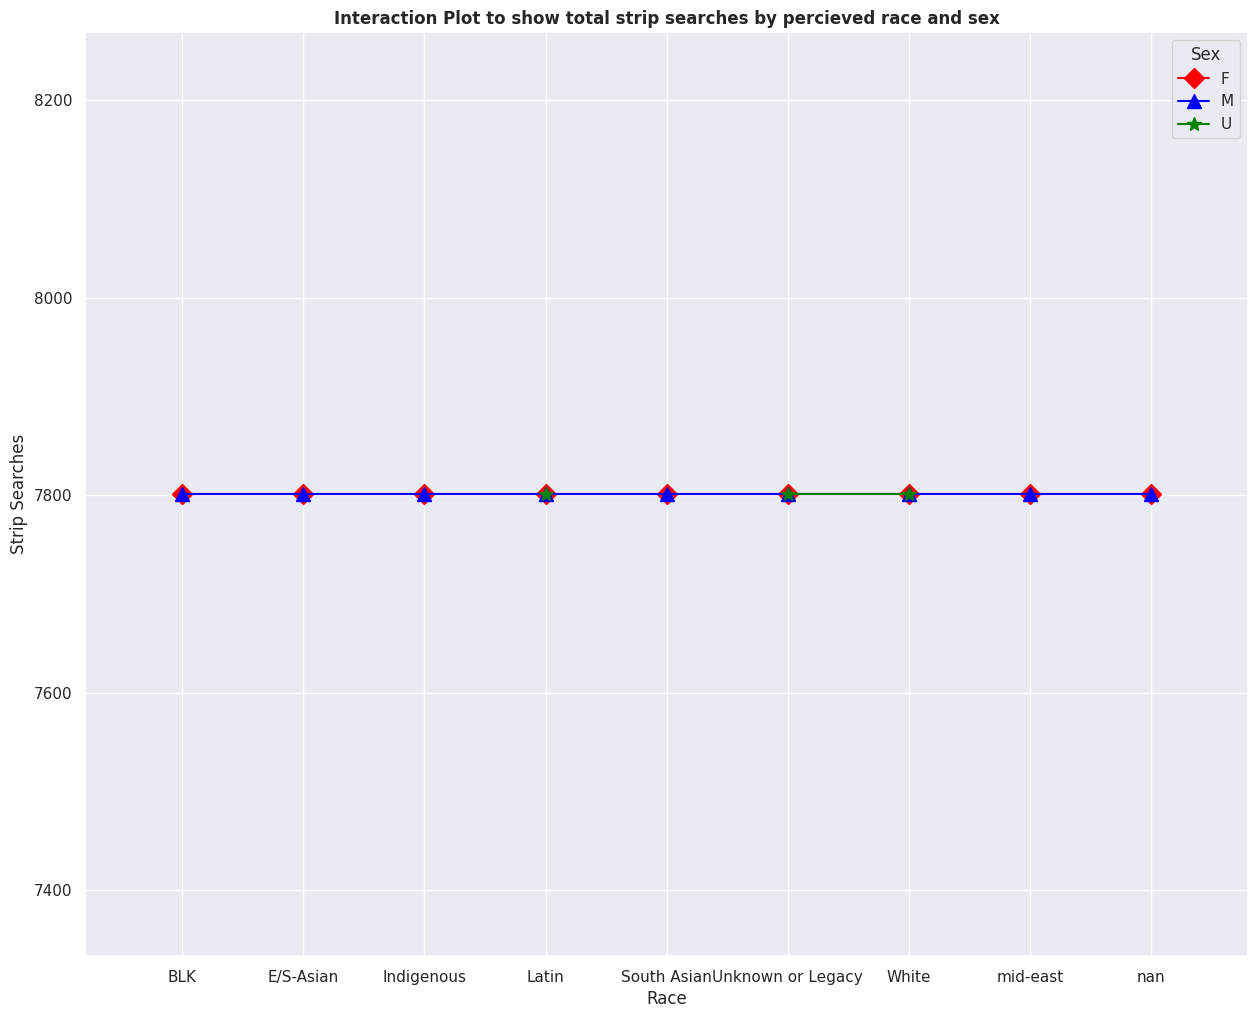

In [ ]:
#interaction plot for Race and sex with encounters with police
from statsmodels.graphics.factorplots import interaction_plot

#convert Race into continuous variables

ASDp = ASD.replace(['White','Black','Latino','Indigenous','East/Southeast Asian','Middle-Eastern','South-Asian'],['White','BLK','Latin','Indigenous','E/S-Asian','mid-east','S-Asian'])

SEX = ASDp['Sex'].astype("category")

racecnt = ASDp['Perceived_Race']

strips = ASD['StripSearch'].sum()

RSInteraction = interaction_plot(racecnt,SEX, strips, colors=['red','blue','green'], markers=['D','^','*'], ms=10)

plt.ylabel('Strip Searches')
plt.xlabel('Race')
plt.title('Interaction Plot to show total strip searches by percieved race and sex', fontweight='bold')
plt.show()

# Final Code Section

In [ ]:
#Power Analysis
#useful power functions
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)


In [ ]:
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
#change age groups into numeric/continuous values
#show age groups 
print(ASD['Age_group__at_arrest_'].unique())

['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']


In [ ]:
ASD = ASD.replace(['Aged 25 to 34 years', 'Aged 35 to 44 years','Aged 18 to 24 years','Aged 45 to 54 years','Aged 55 to 64 years','Aged 65 and older','Aged 65 years and older','Aged 17 years and younger','Aged 17 years and under'],['25-34','35-44','18-24','45-54','55-64','65-95','65-95','1-17','1-17' ])



In [ ]:
ASD['Age_group__at_arrest_'].convert_dtypes()
print(ASD['Age_group__at_arrest_'])

0        35-44
1        35-44
2        35-44
3        25-34
4        25-34
         ...  
65271    25-34
65272    35-44
65273    45-54
65274     1-17
65275    18-24
Name: Age_group__at_arrest_, Length: 65276, dtype: object


In [ ]:
#create differing groups per sex comparing strip searches
ASDmen=ASD[ASD['Sex']=='M']
ASDfem=ASD[ASD['Sex']=='F']

ASD_strpsrm=ASDmen['StripSearch']
ASD_strpsrf=ASDfem['StripSearch']



In [ ]:
#do power analysis
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(ASD_strpsrm,ASD_strpsrf)
alpha = 0.05
power = 0.8
ratio_ =len(ASD_strpsrm)/len(ASD_strpsrf) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Strip Searching:',effect_size)
     

Effect size (Cohen's D) for Strip Searching: 0.0681807461196724


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ASD_strpsrm') 
print('Actual size of ASD_strpsrm:', len(ASD_strpsrm))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for ASD_strpsrf')
print('Actual size of ASD_strpsrf:', len(ASD_strpsrf))

Sample Size of nobs1: 2093.416 needed for ASD_strpsrm
Actual size of ASD_strpsrm: 52650
Sample Size of nobs2: 8735.700 needed for ASD_strpsrf
Actual size of ASD_strpsrf: 12617


In [ ]:
#now we test the power of our sample size
print('This  is the number of obs. for men:',len(ASDmen))

print('This  is the number of obs. for women:',len(ASDfem))

This  is the number of obs. for men: 52650
This  is the number of obs. for women: 12617


In [ ]:
#first we do our power curve for our number of obs for men

from statsmodels.stats.power import TTestPower

power = TTestPower()

n_test = power.solve_power(nobs=52650, effect_size = 0.8, power = None, alpha = 0.05)

print('Power: {:.3f}'.format(n_test))

Power: 1.000


In [ ]:
#now we do our power curve for our number of obs for women

n_test = power.solve_power(nobs=12617, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))
     

Power: 1.000


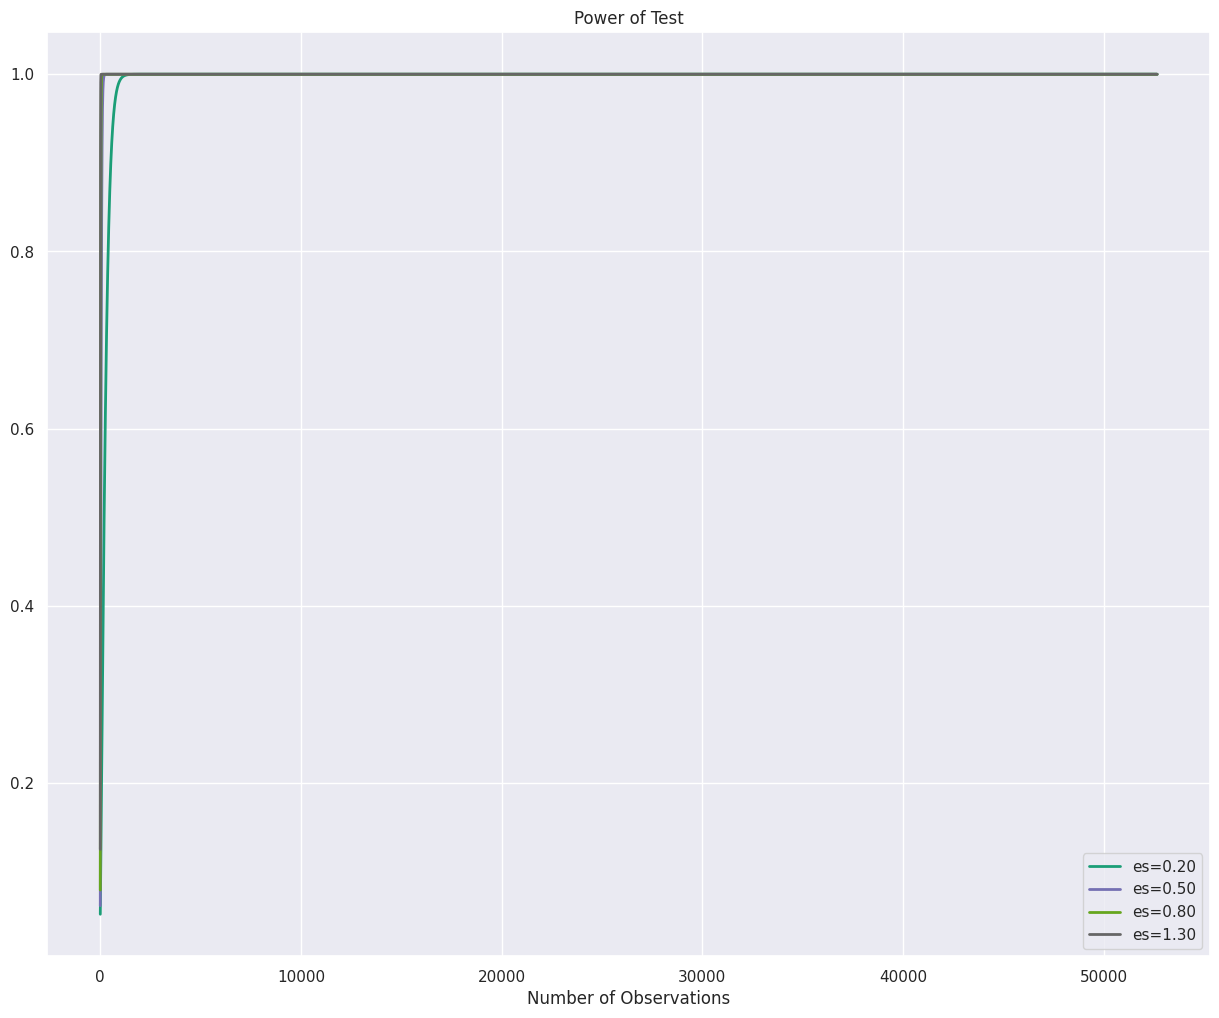

In [ ]:
#we graph a power curve
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(2, 52659))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()

     


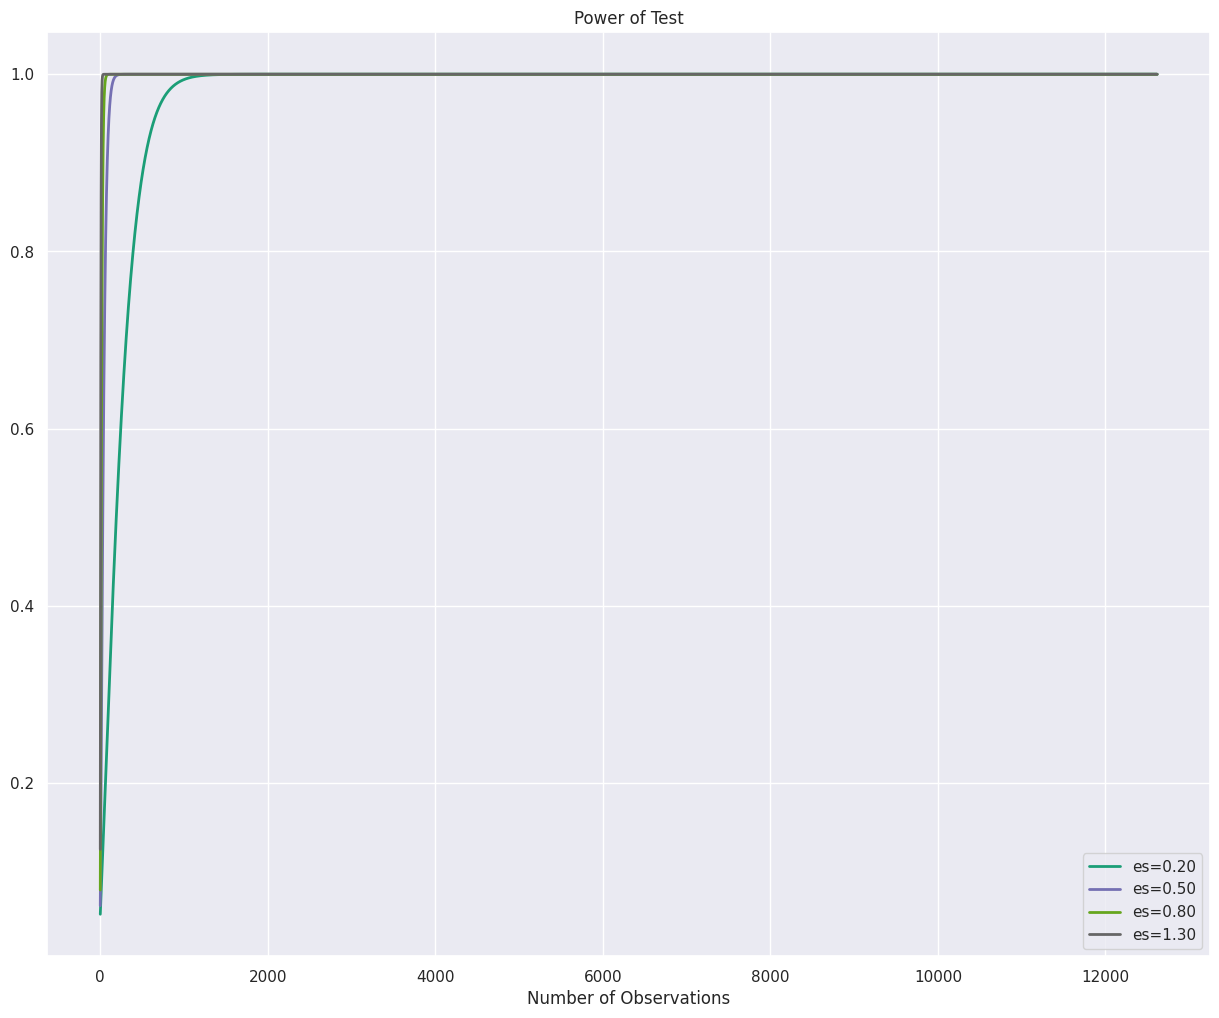

In [ ]:
#we graph a power curve
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(2, 12617))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()

     


In [ ]:
#ANCOVA

In [ ]:
ASD

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0000,326622,White,M,35-44,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0000,326622,White,M,35-44,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0000,326622,Unknown or Legacy,M,35-44,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0000,327535,Black,M,25-34,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0000,327535,South Asian,M,25-34,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0000,316123,Indigenous,F,25-34,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0000,307736,South Asian,M,35-44,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0000,324057,White,F,45-54,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0000,331870,Unknown or Legacy,M,1-17,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [ ]:
ASD.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [ ]:
temp_df = ASD[['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__', 
      'Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst', 
      'Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative',
      'StripSearch','Perceived_Race']]

In [ ]:
temp_df.head()

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,StripSearch,Perceived_Race
0,0,0,0,0,0,1,0,White
1,0,0,0,0,0,0,0,White
2,0,0,0,0,0,0,0,Unknown or Legacy
3,0,0,0,0,0,0,0,Black
4,0,0,0,0,0,0,0,South Asian


In [ ]:
temp_df['all_Actions'] = ASD['Actions_at_arrest___Concealed_i'] + ASD['Actions_at_arrest___Combative__'] + ASD['Actions_at_arrest___Resisted__d'] + ASD['Actions_at_arrest___Mental_inst'] + ASD['Actions_at_arrest___Assaulted_o'] + ASD['Actions_at_arrest___Cooperative']

In [ ]:
temp_df

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,StripSearch,Perceived_Race,all_Actions
0,0,0,0,0,0,1,0,White,1
1,0,0,0,0,0,0,0,White,0
2,0,0,0,0,0,0,0,Unknown or Legacy,0
3,0,0,0,0,0,0,0,Black,0
4,0,0,0,0,0,0,0,South Asian,0
...,...,...,...,...,...,...,...,...,...
65271,0,0,1,0,0,0,0,Indigenous,1
65272,0,0,0,0,0,0,0,South Asian,0
65273,0,0,0,0,0,0,0,White,0
65274,0,0,0,0,0,1,0,Unknown or Legacy,1


In [ ]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [ ]:
model = ols('all_Actions ~ StripSearch + Perceived_Race', data=temp_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            all_Actions   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     42.01
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.29e-67
Time:                        21:55:06   Log-Likelihood:                -57474.
No. Observations:               65272   AIC:                         1.150e+05
Df Residuals:                   65263   BIC:                         1.150e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
Perceived_Race_dict = {value:i for i,value in enumerate(list(set(list(temp_df['Perceived_Race']))))}

In [ ]:
import warnings
warnings.filterwarnings("ignore")

temp_df['Perceived_Race_value'] = temp_df['Perceived_Race'].apply(lambda x:Perceived_Race_dict[x])

In [ ]:
temp_df

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,StripSearch,Perceived_Race,all_Actions,Perceived_Race_value
0,0,0,0,0,0,1,0,White,1,6
1,0,0,0,0,0,0,0,White,0,6
2,0,0,0,0,0,0,0,Unknown or Legacy,0,0
3,0,0,0,0,0,0,0,Black,0,5
4,0,0,0,0,0,0,0,South Asian,0,3
...,...,...,...,...,...,...,...,...,...,...
65271,0,0,1,0,0,0,0,Indigenous,1,2
65272,0,0,0,0,0,0,0,South Asian,0,3
65273,0,0,0,0,0,0,0,White,0,6
65274,0,0,0,0,0,1,0,Unknown or Legacy,1,0


In [ ]:
model_value = ols('all_Actions ~ StripSearch + Perceived_Race_value', data=temp_df).fit()
print(model_value.summary())

                            OLS Regression Results                            
Dep. Variable:            all_Actions   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.03e-64
Time:                        21:55:06   Log-Likelihood:                -57499.
No. Observations:               65276   AIC:                         1.150e+05
Df Residuals:                   65273   BIC:                         1.150e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5330 

In [ ]:
# Perceived_Race and StripSearch both have a positive correlation coefficient indicating a positive effect on the variable, positive correlation

In [ ]:
temp_df['Age_group__at_arrest_'] = ASD['Age_group__at_arrest_']

In [ ]:
age_dict = {value:i for i,value in enumerate(list(set(temp_df['Age_group__at_arrest_'])))}

In [ ]:
temp_df['Age_group__at_arrest_value'] = temp_df['Age_group__at_arrest_'].apply(lambda x:age_dict[x])

In [ ]:
temp_df.head()

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,StripSearch,Perceived_Race,all_Actions,Perceived_Race_value,Age_group__at_arrest_,Age_group__at_arrest_value
0,0,0,0,0,0,1,0,White,1,6,35-44,5
1,0,0,0,0,0,0,0,White,0,6,35-44,5
2,0,0,0,0,0,0,0,Unknown or Legacy,0,0,35-44,5
3,0,0,0,0,0,0,0,Black,0,5,25-34,6
4,0,0,0,0,0,0,0,South Asian,0,3,25-34,6


In [ ]:
model2 = ols('all_Actions ~ StripSearch + Perceived_Race + Age_group__at_arrest_', data=temp_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            all_Actions   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.25
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.22e-66
Time:                        21:55:08   Log-Likelihood:                -57444.
No. Observations:               65248   AIC:                         1.149e+05
Df Residuals:                   65233   BIC:                         1.151e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
model3 = ols('all_Actions ~ StripSearch + Perceived_Race + Age_group__at_arrest_value', data=temp_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            all_Actions   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.39
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.84e-67
Time:                        21:55:09   Log-Likelihood:                -57474.
No. Observations:               65272   AIC:                         1.150e+05
Df Residuals:                   65262   BIC:                         1.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
#Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#remove words from age column
ASDp = ASDp.replace(['Aged 25 to 34 years', 'Aged 35 to 44 years','Aged 18 to 24 years','Aged 45 to 54 years','Aged 55 to 64 years','Aged 65 and older','Aged 65 years and older','Aged 17 years and younger','Aged 17 years and under'],['25-34','35-44','18-24','45-54','55-64','65-95','65-95','1-17','1-17' ])

In [ ]:
#1 hot encode age groups
ASDp['Age_group__at_arrest_value'] = ASDp['Age_group__at_arrest_'].apply(lambda x:age_dict[x])

In [ ]:
#1hot encode races
import warnings
warnings.filterwarnings("ignore")

ASDp['Perceived_Race_value'] = ASD['Perceived_Race'].apply(lambda x:Perceived_Race_dict[x])

In [ ]:
Sex_dict = {value:i for i,value in enumerate(list(set(list(ASDp['Sex']))))}

In [ ]:
ASDp['Sex_cat_val'] = ASDp['Sex'].apply(lambda x:Sex_dict[x])

In [ ]:
print(ASDp['Age_group__at_arrest_'].where(ASDp['Age_group__at_arrest_value'] == 0))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
65271    NaN
65272    NaN
65273    NaN
65274    NaN
65275    NaN
Name: Age_group__at_arrest_, Length: 65276, dtype: object


In [ ]:
#define data frames for logistic regression
#independent
x = ASDp[['Age_group__at_arrest_value','Perceived_Race_value','Sex_cat_val']].copy()

#use 1hot encode categorical var

#dependent
y = ASD['StripSearch']

In [ ]:
#split data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [ ]:
y_train

20960    0
64139    0
10799    0
1378     1
41430    0
        ..
61404    0
17730    0
28030    0
15725    0
52734    0
Name: StripSearch, Length: 52220, dtype: int64

In [ ]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()
     

Formula:  StripSearch ~ Age_group__at_arrest_value + Perceived_Race_value + Sex_cat_val 

Optimization terminated successfully.
         Current function value: 0.363027
         Iterations 6


In [ ]:
log_reg_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52216
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.003304
Time:                        21:55:11   Log-Likelihood:                -18957.
converged:                       True   LL-Null:                       -19020.
Covariance Type:            nonrobust   LLR p-value:                 4.562e-27
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.3455      0.053    -44.571      0.000      -2.449      -2.242
Age_group__at_arrest_value     0.0713      0.008      9.133      0.000       0.056       0.087
Perceived_Race_value           0.0115      0.007      1.702      0.089      -0.002       0.025
Sex_cat_val                   -0.2298      0.036     -6.351      0.000      -0.301      -0.159
==============================================================================================
"""

In [ ]:
reg = smf.logit('StripSearch ~ Age_group__at_arrest_value + Perceived_Race_value + Sex_cat_val ', data=trainingdata).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.363027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52216
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.003304
Time:                        21:55:13   Log-Likelihood:                -18957.
converged:                       True   LL-Null:                       -19020.
Covariance Type:            nonrobust   LLR p-value:                 4.562e-27
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.3455      0.053    -44.571      0.000      

In [ ]:
np.exp(reg.params)

Intercept                    0.0958
Age_group__at_arrest_value   1.0739
Perceived_Race_value         1.0116
Sex_cat_val                  0.7947
dtype: float64

In [ ]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.0864,0.1062,0.0958
Age_group__at_arrest_value,1.0576,1.0904,1.0739
Perceived_Race_value,0.9982,1.0251,1.0116
Sex_cat_val,0.7403,0.8531,0.7947


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     

In [ ]:
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))



Test accuracy =  0.8770680147058824


In [ ]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[11451     0]
 [ 1605     0]]


In [ ]:
#Prediction Interval

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reuse variables from Log. Reg.
#independent
x1 = ASDp[['Age_group__at_arrest_value','Perceived_Race_value','Sex_cat_val']].copy()

#use 1hot encode categorical var



#dependent
y1 = ASD[['StripSearch']]

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age_group__at_arrest_value  65276 non-null  int64
 1   Perceived_Race_value        65276 non-null  int64
 2   Sex_cat_val                 65276 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.2, random_state=321)

In [ ]:
print(f"X1_train shape: {X1_train.shape}")
print(f"y1_train shape: {y1_train.shape}")
print("\n========== Training data ==========")
display(y1_train.describe().T)
print(f"X1_test shape: {X1_test.shape}")
print(f"y1_test shape: {y1_test.shape}")
print("\n========== Test data ==========")
display(y1_test.describe().T)     

X1_train shape: (52220, 3)
y1_train shape: (52220, 1)

========== Training data ==========


,count,mean,std,min,25%,50%,75%,max
StripSearch,52220.0000,0.1184,0.3231,0.0000,0.0000,0.0000,0.0000,1.0000


X1_test shape: (13056, 3)
y1_test shape: (13056, 1)

========== Test data ==========


,count,mean,std,min,25%,50%,75%,max
StripSearch,13056.0000,0.1238,0.3293,0.0000,0.0000,0.0000,0.0000,1.0000


In [ ]:
#model needs an intercept so we add a column of 1s
X1 = sm.add_constant(X1_train)
X1
     

,const,Age_group__at_arrest_value,Perceived_Race_value,Sex_cat_val
50683,1.0000,6,5,0
10611,1.0000,1,6,1
7611,1.0000,1,6,0
42163,1.0000,1,3,1
5175,1.0000,6,6,0
...,...,...,...,...
5929,1.0000,6,6,0
43807,1.0000,5,6,1
4220,1.0000,6,6,0
6682,1.0000,5,0,0


In [ ]:
OLSpi = sm.OLS(y1_train, sm.add_constant(X1_train)).fit() 

print(OLSpi.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     40.42
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           4.40e-26
Time:                        21:55:13   Log-Likelihood:                -15043.
No. Observations:               52220   AIC:                         3.009e+04
Df Residuals:                   52216   BIC:                         3.013e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
#Get the mean prediction, confidence interval boundaries, prediction interval boundaries
sm_pred = OLSpi.get_prediction(sm.add_constant(X1_test)).summary_frame(alpha=0.05)
sm_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
35295,0.1025,0.0033,0.0960,0.1090,-0.5301,0.7352
59786,0.1203,0.0016,0.1172,0.1235,-0.5123,0.7529
34813,0.1346,0.0021,0.1305,0.1388,-0.4980,0.7673
64564,0.1149,0.0037,0.1076,0.1222,-0.5177,0.7476
53112,0.1298,0.0027,0.1246,0.1350,-0.5028,0.7625


In [ ]:
df_assess = OLSpi.get_prediction(sm.add_constant(X1_test)).summary_frame(alpha=0.1)[['obs_ci_lower', 'obs_ci_upper']]
df_assess

,obs_ci_lower,obs_ci_upper
35295,-0.4284,0.6335
59786,-0.4106,0.6512
34813,-0.3963,0.6656
64564,-0.4160,0.6459
53112,-0.4011,0.6608
...,...,...
54936,-0.4010,0.6608
2962,-0.4154,0.6465
29707,-0.4275,0.6345
46555,-0.3944,0.6675


In [ ]:
#Convert the test data to a pandas series to run the ols_correct test
y1_test = y1_test.squeeze()

In [ ]:
#examine what percentage of target values in the test data were within the prediction intervals:

ols_correct = np.mean(y1_test.between(df_assess['obs_ci_lower'], df_assess['obs_ci_upper']))

print(f"{ols_correct:.2%} of the prediction intervals contain true target.")

87.62% of the prediction intervals contain true target.


NameError: ignored